In [1]:
import os
import pickle

from human_aware_rl.rllib.utils import get_base_ae
from human_aware_rl.irl.config_model import get_train_config
from overcooked_ai_py.mdp.overcooked_mdp import OvercookedState

In [2]:
def _loadProcessedHumanData(data_path, view_traj=False):
    assert os.path.isfile(data_path)
    with open(data_path, 'rb') as file:
        human_data = pickle.load(file)
    
    gridworld = human_data['gridworld']
    trajectory = human_data['trajectory']

    states = []
    actions = []
    scores = []
    for i in range(len(trajectory)):
        state = []
        action = []
        score = []
        for j in range(len(trajectory[i])):
            state_dict = trajectory[i][j]
            s = state_dict['state']
            a = state_dict['joint_action']
            sc = state_dict['score']

            s = OvercookedState.from_dict(s)
            state.append(s)
            action.append(a)
            score.append(sc)
            
            if view_traj:
                print(gridworld.state_string(s))
        states.append(state)
        actions.append(action)
        scores.append(score)

    assert len(states) == len(trajectory)
    assert len(actions) == len(trajectory)
    assert len(scores) == len(trajectory)
    return states, actions, scores

In [3]:
# path to the processed data files
no_coop_path = '/home/jasmine/moral-ai-irl/overcooked_participants_data/cleaned/trajectories_onion_cook_2022-07-31_15:05:31.data'
coop_path = '/home/jasmine/moral-ai-irl/overcooked_participants_data/cleaned/trajectories_onion_help_2022-07-31_14:54:48.data'

# setup game environment
config = get_train_config()
mdp_params = config["environment_params"]["mdp_params"]
env_params = config["environment_params"]["env_params"]
ae = get_base_ae(mdp_params, env_params)
env = ae.env

In [4]:
print('Loading no-coop data...')
nc_states, nc_actions, nc_scores = _loadProcessedHumanData(no_coop_path, view_traj=False)
print(f'\tnumber of games: {len(nc_states)}')

nc_sum = 0
nc_lenMin = 50  # placeholder value, it is known that the minimal length is <50.
nc_lenMax = 0
nc_lenDict = {}
for _s in nc_states:
    nc_sum += len(_s)
    val = nc_lenDict.get(len(_s), 0)
    nc_lenDict[len(_s)] = val+1
    nc_lenMin = min(len(_s), nc_lenMin)
    nc_lenMax = max(len(_s), nc_lenMax)
print(f'\tavg length per game={nc_sum / len(nc_states)}, max length={nc_lenMax}, min length={nc_lenMin}')

Loading no-coop data...
	number of games: 1922
	avg length per game=13.539542143600416, max length=51, min length=8


In [5]:
print('Loading coop data...')
co_states, co_actions, co_scores = _loadProcessedHumanData(coop_path, view_traj=False)
print(f'\tnumber of games: {len(co_states)}')

co_sum = 0
co_lenMin = 50  # placeholder value, it is known that the minimal length is <50.
co_lenMax = 0
co_lenDict = {}
for _s in co_states:
    co_sum += len(_s)
    val = co_lenDict.get(len(_s), 0)
    co_lenDict[len(_s)] = val+1
    co_lenMin = min(len(_s), co_lenMin)
    co_lenMax = max(len(_s), co_lenMax)
print(f'\tavg length per game={co_sum / len(co_states)}, max length={co_lenMax}, min length={co_lenMin}')

Loading coop data...
	number of games: 352
	avg length per game=6.948863636363637, max length=49, min length=4


In [6]:
import matplotlib.pyplot as plt

def freq2list(freq):
    cnt = len(freq)
    lst = []
    i = 0
    while cnt > 0:
        if i in freq:
            lst.append(freq[i])
            cnt -= 1
        else:
            lst.append(0)
        i += 1
    return lst

def plot_frequency(freq, title):
    plt.clf()
    plt.plot(freq)
    plt.title(title)
    plt.show()

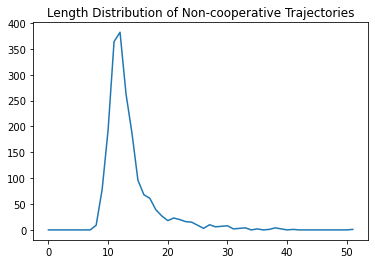

frequency in list=[0, 0, 0, 0, 0, 0, 0, 0, 9, 78, 193, 364, 382, 263, 187, 96, 68, 61, 39, 27, 18, 23, 20, 16, 15, 9, 3, 10, 6, 7, 8, 2, 3, 4, 0, 2, 0, 1, 4, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [7]:
nc_freq = freq2list(nc_lenDict)
plot_frequency(nc_freq, "Length Distribution of Non-cooperative Trajectories")
print(f'frequency in list={nc_freq}')

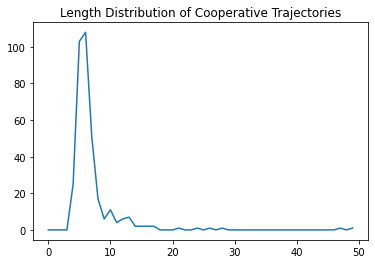

frequency in list=[0, 0, 0, 0, 25, 103, 108, 51, 17, 6, 11, 4, 6, 7, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]


In [8]:
co_freq = freq2list(co_lenDict)
plot_frequency(co_freq, "Length Distribution of Cooperative Trajectories")
print(f'frequency in list={co_freq}')